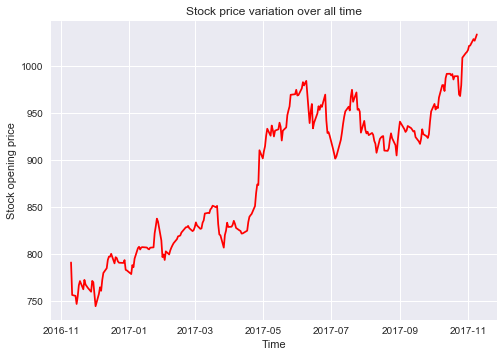

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Creating Monthly predictions
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
[('Dec', 2016), ('Jun', 2017), ('Nov', 2017), ('Sep', 2017), ('May', 2017), ('Nov', 2016), ('Aug', 2017), ('Mar', 2017), ('Jan', 2017), ('Oct', 2017), ('Jul', 2017), ('Apr', 2017), ('Feb', 2017)]
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Predictions for Nov-2017
Y=1.72513513514X+1017.60675676
Mean squared error: 3.80
Variance score: 0.86


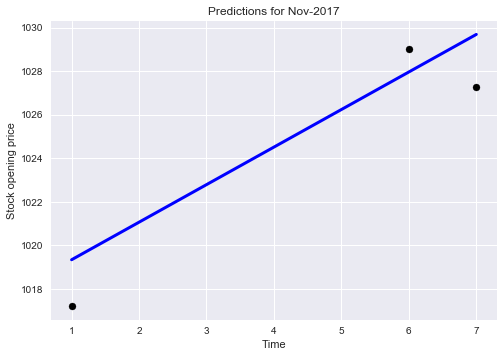

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Sampling the stock prices  on a monthly basis
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


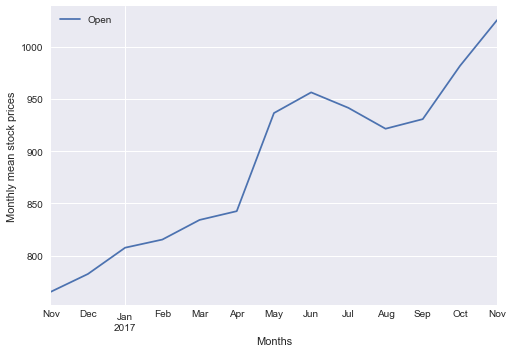

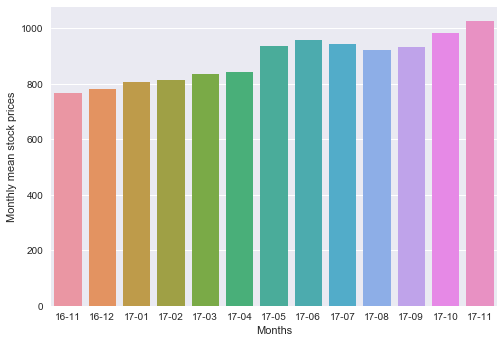

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Stock prices predictions on a montly basis
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Y=0.653352064198X (Days) +762.129205067
Mean squared error: 1651.09
Variance score: 0.45


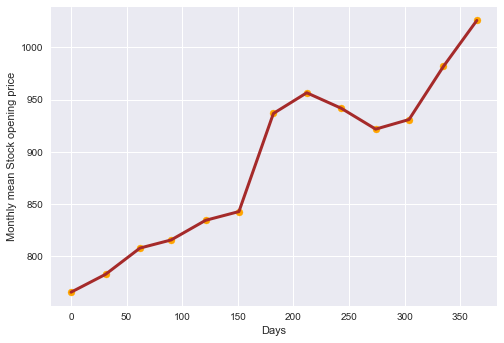

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Ridge Regression
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Ridge Regression
Y=0.653350051066X (Days) +762.12958622
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Mean squared error: 1651.09
Variance score: 0.45


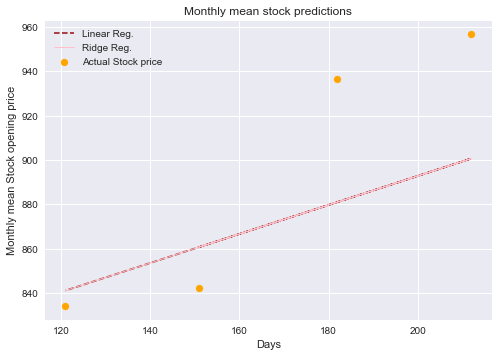

In [1]:
#### Importing necessary libraries 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
### The Google dataset We will be predicting the future price of 
#Google’s stock using simple linear regression. The data that we will 
#be using is real data obtained from Google Finance 
# The data is taken from https://finance.google.com/finance/historical?cid=
#304466804484872&startdate=Nov%2010%2C%202016&enddate=Nov%209%2C%202017&num=30&ei=_-QEWpG-L4nGUZ_Dn2g&start=30
## The aim of the exercise is to predict the future opening price of the stock 
url='goog.xlsx'
df_goog_stck= pd.read_excel('goog.xlsx')
sns.set()
plt.plot(df_goog_stck['Date'],df_goog_stck['Open'],color='red')
plt.xlabel("Time")
plt.ylabel("Stock opening price")
plt.title("Stock price variation over all time")
plt.show()
#numb_of_years=sorted(df_goog_stck['Date'].dt.year.unique().tolist(),reverse=True)
numb_of_years=sorted(df_goog_stck['Date'].dt.strftime("%y-%m").unique().tolist(),reverse=True) 
## We will separate the datasets into different years 
lstdf=[pd.DataFrame()]*(len(numb_of_years))
spacer=100
print '+'*spacer
## Creating Monthly predictions 
print "Creating Monthly predictions"
## Creating separate Datframes in pandas on a montly basis.
for index in range (len(numb_of_years)):
    lstdf[index]= df_goog_stck[df_goog_stck.Date.dt.strftime("%y-%m")==numb_of_years[index]]
    
mthyearsstcks=[]
for index in range(len(lstdf)):
    mthyearsstcks.append(repr(lstdf[index].Date.dt.month.unique()[0])+'-'+\
                         repr(lstdf[index].Date.dt.year.unique()[0]))

    
# Which month and year  we want to make predictions for:

yrlist=[]
mthlist=[]
for index in range(len(lstdf)):
    yrlist.append(lstdf[index].Date.dt.year.unique()[0])
    mthlist.append(lstdf[index].Date.dt.month.unique()[0]) 
monthnam=list(map((lambda x: calendar.month_abbr[x]),mthlist))
dfs=range(len(lstdf))
dict_month=dict(zip(dfs,zip(monthnam,yrlist)))
invrt_dict_month=dict(zip(zip(monthnam,yrlist),dfs))
print '+'*spacer

print invrt_dict_month.keys()

print '+'*spacer
prtn=invrt_dict_month[('Nov', 2017)]
split_size=0.3
itern=100
print '+'*spacer

print "Predictions for "+str(dict_month[prtn][0])+"-"+str(dict_month[prtn][1])

# Split the targets into training/testing sets

dates_X_train,dates_X_test,stock_y_train,stock_y_test = \
train_test_split(lstdf[prtn].Date.dt.day[:,np.newaxis],\
lstdf[prtn].Open[:,np.newaxis],\
test_size=split_size)

# = train_test_split(lstdf[prtn].Open[:,np.newaxis], test_size=split_size)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(dates_X_train, stock_y_train)


# Make predictions using the testing set
stock_y_pred = regr.predict(dates_X_test)
   

# The coefficients
#print('Coefficients: \n', regr.coef_)
# Intercept
#print('Intercept: \n', regr.intercept_)
print "Y="+ str(regr.coef_[0,0])+ "X" + "+" + str(regr.intercept_[0])
    # The mean squared error
print("Mean squared error: %.2f"% \
mean_squared_error(stock_y_test, stock_y_pred))
    # Explained variance score: 1 is perfect prediction
    ## Best possible score is 1.0 and it can be negative 
    ## (because the model can be arbitrarily worse).
print('Variance score: %.2f' % r2_score(stock_y_test, stock_y_pred))

sns.set()
plt.scatter(dates_X_test, stock_y_test,  color='black')
plt.plot(dates_X_test, stock_y_pred, color='blue', linewidth=3)
plt.xlabel("Time")
plt.ylabel("Stock opening price")
plt.title("Predictions for "+str(dict_month[prtn][0])+"-"+str(dict_month[prtn][1]))
plt.show()

print '+'*spacer
## Creating Monthly predictions 
print "Sampling the stock prices  on a monthly basis"
print '+'*spacer
df_goog_stck_mon=df_goog_stck[['Date','Open']]
df_goog_stck_mon.index=df_goog_stck_mon['Date']
del df_goog_stck_mon['Date']
sns.set()
mnthlymendf=df_goog_stck_mon.resample('M').mean()
#mnthlymendf.reset_index().plot(x='index',y='Open')
mnthlymendf.plot(y='Open')
plt.xlabel("Months")
plt.ylabel("Monthly mean stock prices")
plt.show()
sns.set()
sns.barplot(x=mnthlymendf.index.strftime("%y-%m"), y=mnthlymendf['Open'])
plt.xlabel("Months")
plt.ylabel("Monthly mean stock prices")
plt.show()
print '+'*spacer
print "Stock prices predictions on a montly basis"
print '+'*spacer
dfmnthlystck=mnthlymendf.reset_index()
dfmnthlystck['datemin']=dfmnthlystck['Date'].min()
dfmnthlystck['date_delta']=dfmnthlystck['Date'].sub(dfmnthlystck['datemin'], axis=0).dt.days
#dfmnthlystck.index=dfmnthlystck['Date']
columns = ['datemin']
dfmnthlystck.drop(columns, inplace=True, axis=1)



dates_X_train,dates_X_test,stock_y_train,stock_y_test = train_test_split(dfmnthlystck.date_delta[:,np.newaxis],\
                                                                         dfmnthlystck.Open[:,np.newaxis],\
                                                                         test_size=split_size)

# = train_test_split(dfmnthlystck.Open[:,np.newaxis], test_size=split_size)


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(dates_X_train, stock_y_train)


# Make predictions using the testing set
stock_y_pred = regr.predict(dates_X_test)
   

# The coefficients
#print('Coefficients: \n', regr.coef_)
# Intercept
#print('Intercept: \n', regr.intercept_)
print "Y="+ str(regr.coef_[0,0])+ "X (Days) " + "+" + str(regr.intercept_[0])
    # The mean squared error
print("Mean squared error: %.2f"% \
mean_squared_error(stock_y_test, stock_y_pred))
    # Explained variance score: 1 is perfect prediction
    ## Best possible score is 1.0 and it can be negative 
    ## (because the model can be arbitrarily worse).
print('Variance score: %.2f' % r2_score(stock_y_test, stock_y_pred))
sns.set()
plt.scatter(dfmnthlystck['date_delta'],dfmnthlystck['Open'],  color='orange')
plt.plot(dfmnthlystck['date_delta'],dfmnthlystck['Open'], color='brown', linewidth=3)
plt.xlabel("Days")
plt.ylabel("Monthly mean Stock opening price")
plt.plot
plt.show()

print '+'*spacer
print "Ridge Regression"

reg = Ridge(alpha = .5)

print '+'*spacer

# Train the model using the training sets
reg.fit(dates_X_train, stock_y_train)


# Make predictions using the testing set
stock_y_pred_ridge = reg.predict(dates_X_test)
   

# The coefficients
#print('Coefficients: \n', regr.coef_)
# Intercept
#print('Intercept: \n', regr.intercept_)
print '+'*spacer
print "Ridge Regression"
print "Y="+ str(reg.coef_[0,0])+ "X (Days) " + "+" + str(reg.intercept_[0])
print '+'*spacer
    # The mean squared error
print("Mean squared error: %.2f"% \
mean_squared_error(stock_y_test, stock_y_pred_ridge))
    # Explained variance score: 1 is perfect prediction
    ## Best possible score is 1.0 and it can be negative 
    ## (because the model can be arbitrarily worse).
print('Variance score: %.2f' % r2_score(stock_y_test,stock_y_pred_ridge))
f, ax = plt.subplots(1, 1)
sns.set()
#plt.scatter(dates_X_test, stock_y_test,  color='orange')
ax.scatter(dates_X_test, stock_y_test,  color='orange',label="Actual Stock price")
ax.plot(dates_X_test, stock_y_pred, color='brown',linestyle="--",label="Linear Reg.")
ax.plot(dates_X_test, stock_y_pred_ridge, color='pink', linewidth=1,label="Ridge Reg.")
ax.legend()
plt.xlabel("Days")
plt.ylabel("Monthly mean Stock opening price")
plt.title("Monthly mean stock predictions")
plt.show()